In [1]:
from DS_detector import gen_pics_for_detection, detect_clusters
from DS_Planck_Unet import unet_planck
from DS_data_transformation import draw_df
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
model = unet_planck(
    weights='/home/rt2122/Models/planck_z/f8d0.8.ep0125-vl0.017043-l0.023604.h5')

In [3]:
all_dict = gen_pics_for_detection(6, model, step=16)

In [4]:
thr_list = [0.1 * i for i in range(9, 0, -1)]

In [5]:
stat_p = []
stat_pnz = []
stat_m = []
for thr in thr_list:
    stat_p.append(pd.DataFrame(detect_clusters(all_dict, thr, main_cat='planck_z'), 
                                index=[0]))
    stat_pnz.append(pd.DataFrame(detect_clusters(all_dict, thr, main_cat='planck_no_z'), 
                                index=[0]))
    stat_m.append(pd.DataFrame(detect_clusters(all_dict, thr, main_cat='mcxcwp'), 
                                index=[0]))
stat_p = pd.concat(stat_p)
stat_pnz = pd.concat(stat_pnz)
stat_m = pd.concat(stat_m)

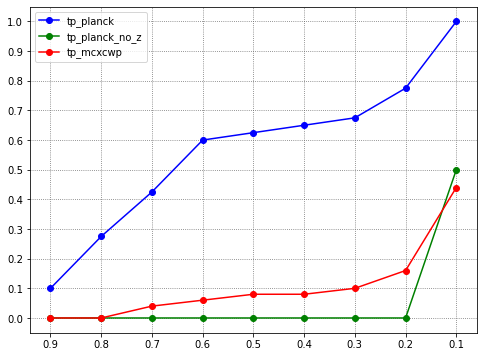

In [6]:
draw_df(None, {'tp_planck' : stat_p['tp'] / (stat_p['tp'] + stat_p['fn']), 
               'tp_planck_no_z' : stat_pnz['tp'] / (stat_pnz['tp'] + stat_pnz['fn']),
               'tp_mcxcwp' : stat_m['tp'] / (stat_m['tp'] + stat_m['fn']),
              },
        thr_list, ygrid=np.arange(0,1.1, 0.1))

In [7]:
stat_all = []
for thr in thr_list:
    stat_all.append(pd.DataFrame(detect_clusters(all_dict, thr, main_cat='all'), 
                                index=[0]))
stat_all = pd.concat(stat_all)


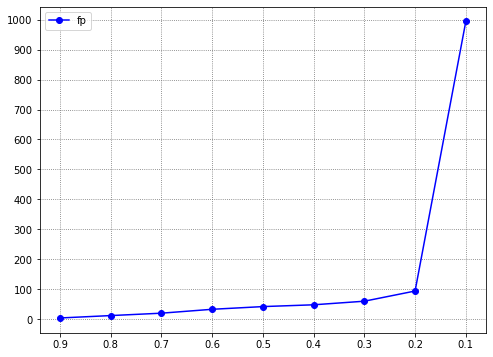

In [8]:
draw_df(None, {'fp':stat_all['fp']},
        thr_list, ygrid=np.arange(0,1100,100))